##### Lab 5
Apply, Groupby operations

### Learning objectives 
Upon successful completion of this lab, you will have demonstrated the abilities to: 

- Applying functions across columns or rows of data
- Use Groupby operations to aggregate, transform, and filter data
- Use built-in and custom user functions to perform groupby operations


In [106]:
import pandas as pd
housing = pd.read_csv('housing.csv')
housing

,Neighborhood,Building.Classification,Total.Units,Year.Built,Gross.SqFt,Estimated.Gross.Income,Gross.Income.per.SqFt,Estimated.Expense,Expense.per.SqFt,Net.Operating.Income,Full.Market.Value,Market.Value.per.SqFt,Boro
0,FINANCIAL,R9-CONDOMINIUM,42,1920.0,36500,1332615,36.51,342005,9.37,990610,7300000,200.00,Manhattan
1,FINANCIAL,R4-CONDOMINIUM,78,1985.0,126420,6633257,52.47,1762295,13.94,4870962,30690000,242.76,Manhattan
2,FINANCIAL,RR-CONDOMINIUM,500,NaN,554174,17310000,31.24,3543000,6.39,13767000,90970000,164.15,Manhattan
3,FINANCIAL,R4-CONDOMINIUM,282,1930.0,249076,11776313,47.28,2784670,11.18,8991643,67556006,271.23,Manhattan
4,TRIBECA,R4-CONDOMINIUM,239,1985.0,219495,10004582,45.58,2783197,12.68,7221385,54320996,247.48,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,ROSEBANK,R4-CONDOMINIUM,52,NaN,62391,831672,13.33,326305,5.23,505367,3354003,53.76,Staten Island
2622,ARROCHAR-SHORE ACRES,R4-CONDOMINIUM,102,1987.0,90618,1274089,14.06,637045,7.03,637044,5233000,57.75,Staten Island
2623,GRANT CITY,R4-CONDOMINIUM,100,1986.0,78903,1321625,16.75,673832,8.54,647793,4687000,59.40,Staten Island
2624,GRANT CITY,R4-CONDOMINIUM,159,1961.0,166712,2343971,14.06,1171985,7.03,1171986,5967531,35.80,Staten Island


In [107]:
housing.shape

(2626, 13)

In [108]:
housing.columns

Index(['Neighborhood', 'Building.Classification', 'Total.Units', 'Year.Built',
       'Gross.SqFt', 'Estimated.Gross.Income', 'Gross.Income.per.SqFt',
       'Estimated.Expense', 'Expense.per.SqFt', 'Net.Operating.Income',
       'Full.Market.Value', 'Market.Value.per.SqFt', 'Boro'],
      dtype='object')

#### 1. standarization 
- Transform the variable Gross.SqFt to its Zscore and 
- save it into a new column stand_Gross.SqFt. 
- print the first  obs of stand_Gross.SqFt column. 

In [109]:
def zscore(series):
    return (series - series.mean()) / series.std()

housing['stand_Gross.SqFt'] = zscore(housing['Gross.SqFt'])

housing['stand_Gross.SqFt'].head(1) # housing.loc[1, 'stand_Gross.SqFt']

0   -0.321217
Name: stand_Gross.SqFt, dtype: float64

#### 2. define a function 
- define a function outlierDetectionZ that returns the string literal 'low' if the z-score of the input parameter is less than -3 and return the string literal 'high' if the z-score value is greater than 3

In [110]:
def outlierDetectionZ(x):
    if x < -3:
        return 'low'
    elif x > 3:
        return 'high'
    return None

#### 3. Vectorize the function
- vectorize outlierDetectionZ function and name the vectorized function as outlierDetectionZ_vec
- call the vectorized function with housing['stand_Gross.SqFt'] as argument. Save the return value in a variable lowhigh. 
- loop through the list lowhigh, and print the obs labels with either low or high and the corresponding row from the dataframe.  

In [111]:
import numpy as np

# Vectorize the function
outlierDetectionZ_vec = np.vectorize(outlierDetectionZ)

# Apply vectorized function to the standardized column
lowhigh = outlierDetectionZ_vec(housing['stand_Gross.SqFt'])

# Loop through and print outliers
for idx, label in enumerate(lowhigh):
    if label is not None:  # Only print if it's an outlier (high or low)
        print(f"\nLabel: {label}")
        print(housing.iloc[idx])
        print("------------------------------------------\n")


Label: high
Neighborhood                    FINANCIAL
Building.Classification    RR-CONDOMINIUM
Total.Units                           500
Year.Built                            NaN
Gross.SqFt                         554174
Estimated.Gross.Income           17310000
Gross.Income.per.SqFt               31.24
Estimated.Expense                 3543000
Expense.per.SqFt                     6.39
Net.Operating.Income             13767000
Full.Market.Value                90970000
Market.Value.per.SqFt              164.15
Boro                            Manhattan
stand_Gross.SqFt                 3.273149
Name: 2, dtype: object
------------------------------------------


Label: high
Neighborhood                      TRIBECA
Building.Classification    R4-CONDOMINIUM
Total.Units                           546
Year.Built                         1987.0
Gross.SqFt                         586224
Estimated.Gross.Income           24375194
Gross.Income.per.SqFt               41.58
Estimated.Expense        

#### 4. Use apply 
- Instead of vectorizing the function, use apply on housing['stand_Gross.SqFt'] and pass outlierDetectionZ as argument to get obs with labels high/low. 
- show the obs that have labels low or high (as per the previous question)

In [112]:
# Apply outlierDetectionZ function and filter outliers
result = housing[housing['stand_Gross.SqFt'].apply(outlierDetectionZ).notna()]

# Display the outliers
for _, row in result.iterrows():
    print(f"\nLabel: {outlierDetectionZ(row['stand_Gross.SqFt'])}")
    print(row)
    print("------------------------------------------\n")


Label: high
Neighborhood                    FINANCIAL
Building.Classification    RR-CONDOMINIUM
Total.Units                           500
Year.Built                            NaN
Gross.SqFt                         554174
Estimated.Gross.Income           17310000
Gross.Income.per.SqFt               31.24
Estimated.Expense                 3543000
Expense.per.SqFt                     6.39
Net.Operating.Income             13767000
Full.Market.Value                90970000
Market.Value.per.SqFt              164.15
Boro                            Manhattan
stand_Gross.SqFt                 3.273149
Name: 2, dtype: object
------------------------------------------


Label: high
Neighborhood                      TRIBECA
Building.Classification    R4-CONDOMINIUM
Total.Units                           546
Year.Built                         1987.0
Gross.SqFt                         586224
Estimated.Gross.Income           24375194
Gross.Income.per.SqFt               41.58
Estimated.Expense        

#### 5.  Use apply and lambda function 
- on the stand_Gross.SqFt column, call apply with lambda function. 
- the lambda function returns 'outlier' when the z-score is lower than -3 or larger than 3, and none otherwise.

In [113]:
housing['stand_Gross.SqFt'].apply(lambda x: 'outlier' if x < -3 or x > 3 else None)

0          None
1          None
2       outlier
3          None
4          None
         ...   
2621       None
2622       None
2623       None
2624       None
2625       None
Name: stand_Gross.SqFt, Length: 2626, dtype: object

#### 6. Use group by and aggregate functions. 
    6.1. Show the average full market value per boro.

    6.2. Show the average full market value per boro and Neighborhood

    6.3. show the 'average', 'min' and 'max' full market value per boro and Neighborhood. Use agg function and rename the columns as `min Market val`, `max market val` and `avg market val` and also "flatten the dataframe".


In [114]:
print("6.1. Average full market value per boro:")
housing.groupby('Boro')[['Full.Market.Value']].mean()

6.1. Average full market value per boro:


,Full.Market.Value
Boro,
Bronx,6.330082e+06
Brooklyn,3.028974e+06
Manhattan,2.143214e+07
Queens,4.167439e+06
Staten Island,3.313400e+06


In [115]:
print("6.2. Average full market value per boro and Neighborhood:")
housing.groupby(['Boro', 'Neighborhood'])[['Full.Market.Value']].mean()

6.2. Average full market value per boro and Neighborhood:


Full.Market.Value
Boro          Neighborhood                           
Bronx         BEDFORD PARK/NORWOOD          1816498.0
              BELMONT                       2752000.0
              BRONX-UNKNOWN                74391091.5
              BRONXDALE                     3125671.0
              CITY ISLAND                    678001.0
...                                               ...
Staten Island ROSEBANK                      3354003.0
              SILVER LAKE                   2077903.0
              SUNNYSIDE                     2340743.0
              TOMPKINSVILLE                 5697922.0
              WEST NEW BRIGHTON             1148655.0

[152 rows x 1 columns]

In [116]:
print("6.3. Statistics per boro and Neighborhood:") # pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))
# Caluclate
stats_by_boro_neigh_aggregated_df = housing.groupby(['Boro', 'Neighborhood'])['Full.Market.Value'].agg([ # .aggregate([
    'min', 'max', 'mean'
])
# Rename
stats_by_boro_neigh_aggregated_df.rename(columns={
    'mean': 'avg market val',
    'min': 'min Market val',
    'max': 'max market val'
}, inplace=True) # stats_by_boro_neigh_aggregated_df.columns = ['min Market val', 'max market val', 'avg market val']
# Flatten
stats_by_boro_neigh_aggregated_df.reset_index(inplace=True)
# Print in Python_Notebook
stats_by_boro_neigh_aggregated_df

6.3. Statistics per boro and Neighborhood:


,Boro,Neighborhood,min Market val,max market val,avg market val
0,Bronx,BEDFORD PARK/NORWOOD,651996,2981000,1816498.0
1,Bronx,BELMONT,2752000,2752000,2752000.0
2,Bronx,BRONX-UNKNOWN,56470051,92312132,74391091.5
3,Bronx,BRONXDALE,2827000,3424007,3125671.0
4,Bronx,CITY ISLAND,678001,678001,678001.0
...,...,...,...,...,...
147,Staten Island,ROSEBANK,3354003,3354003,3354003.0
148,Staten Island,SILVER LAKE,1845800,2310006,2077903.0
149,Staten Island,SUNNYSIDE,2340743,2340743,2340743.0
150,Staten Island,TOMPKINSVILLE,5697922,5697922,5697922.0


#### 7. grouped zscore versus nongrouped zscore. 
    7.1. Calculate a grouped zscore for full market value per Boro.  
    7.2. Also calculate a non-grouped zscore for full market value. 
    7.3. Show the first 5 obs of each series. 

In [117]:
grouped_zscore = housing.groupby('Boro')['Full.Market.Value'].transform(zscore) # 7.1
print("Grouped zscore:")
grouped_zscore.head() # 7.3.a

Grouped zscore:


0   -0.475363
1    0.311406
2    2.339044
3    1.551468
4    1.106282
Name: Full.Market.Value, dtype: float64

In [118]:
non_grouped_zscore = zscore(housing['Full.Market.Value']) # 7.2
print("Non-grouped zscore:")
non_grouped_zscore.head() # 7.3.b

Non-grouped zscore:


0   -0.239113
1    0.745925
2    3.284534
3    2.298486
4    1.741112
Name: Full.Market.Value, dtype: float64

#### 8. Filter rows based on conditions on groups
    8.1. show the frequency count (number of houses) per Boro. (use value_counts() method) 
    8.2. filter out the houses that belong to a Boro with a frequency count less than 100. name the new dataframe as housing_filtered 
    8.3. show the frequency count (number of houses) per Boro in the filtered_housing dataframe. 

In [119]:
boro_counts = housing['Boro'].value_counts()
print("8.1 Frequency count per Boro:")
boro_counts

8.1 Frequency count per Boro:


Boro
Manhattan        1380
Brooklyn          717
Queens            434
Bronx              69
Staten Island      26
Name: count, dtype: int64

8.2 & 8.3 Filtered houses based on Boro frequency:


Boro
Manhattan    1380
Brooklyn      717
Queens        434
Name: count, dtype: int64

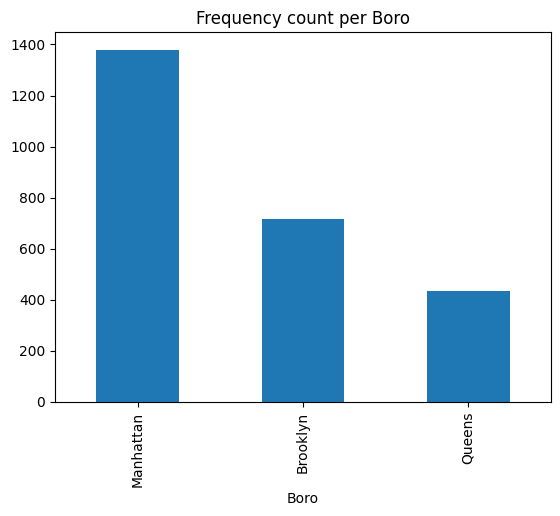

In [120]:
print("8.2 & 8.3 Filtered houses based on Boro frequency:")
# 8.2
boro_mask = housing['Boro'].map(boro_counts) >= 100
housing_filtered = housing[boro_mask]
# 8.3
filtered_counts = housing_filtered.value_counts('Boro') # housing_filtered['Boro'].value_counts()
filtered_counts.plot(kind='bar', title='Frequency count per Boro') # Not Nessary just thought it would be fun.
filtered_counts

#### 9. Calculate the mean of Gross.SqFt and Estimated.Gross.Income by  Boro and Neighborhood
    - define a variable groups that holds grouped dataframe by Boro and Neighborhood. include only the Boro, Neighborhood, Gross.SqFt and Estimated.Gross.Income columns from the original dataset. 
    - show the mean of Gross.SqFt and Estimated.Gross.Income per group.   

In [121]:
groups = housing.groupby(['Boro', 'Neighborhood'])[['Gross.SqFt', 'Estimated.Gross.Income']] # housing[['Boro', 'Neighborhood', 'Gross.SqFt','Estimated.Gross.Income']].groupby(['Boro', 'Neighborhood'])
groups.mean() # .reset_index()

Gross.SqFt  Estimated.Gross.Income
Boro          Neighborhood                                              
Bronx         BEDFORD PARK/NORWOOD  4.827900e+04                562398.5
              BELMONT               4.875000e+04                812175.0
              BRONX-UNKNOWN         2.295597e+06              26939916.0
              BRONXDALE             1.096907e+05               1016980.0
              CITY ISLAND           1.660500e+04                218190.0
...                                          ...                     ...
Staten Island ROSEBANK              6.239100e+04                831672.0
              SILVER LAKE           5.802600e+04                739582.0
              SUNNYSIDE             6.539200e+04                857943.0
              TOMPKINSVILLE         1.590960e+05               1942562.0
              WEST NEW BRIGHTON     2.894300e+04                406939.0

[152 rows x 2 columns]

#### 10. Iterate through the groups and print the gross square feet for Bronx boro in BEDFORD PARK/NORWOOD. 
    The output should be as follows: 
        the gross square Feet for Bronx in BEDFORD PARK/NORWOOD is: 79920

In [122]:
for (boro, neighborhood), group in groups:
    if boro == 'Bronx' and neighborhood == 'BEDFORD PARK/NORWOOD':
        # print(f"\tthe average gross square Feet for {boro} in {neighborhood} is: {group['Gross.SqFt'].mean()}") # NOTE: Wasnt sure if you wanted the mean/sum or Individual values.
        for index, row in group.iterrows():
            if row['Gross.SqFt'] == 79920: # NOTE: Not needed but Question asked this Specific Output.
                print(f"\tthe gross square Feet for {boro} in {neighborhood} is: {row['Gross.SqFt']}")

	the gross square Feet for Bronx in BEDFORD PARK/NORWOOD is: 79920


In [ ]:
# # print("NOTE= Not Sure if you wanted the sum or mean INSTEAD of Above, so I did both.\n\n")
# for (boro, neighborhood), group in groups:
#     if boro == 'Bronx' and neighborhood == 'BEDFORD PARK/NORWOOD':
#         print(f"\tthe average gross square Feet for {boro} in {neighborhood} is: {group['Gross.SqFt'].mean()}")
#         print(f"\tthe total gross square Feet for {boro} in {neighborhood} is: {group['Gross.SqFt'].mean()}")

	the average gross square Feet for Bronx in BEDFORD PARK/NORWOOD is: 48279.0
	the total gross square Feet for Bronx in BEDFORD PARK/NORWOOD is: 48279.0
